# belosgraficos instagram.com/belosgraficos/
## Notebook para a criação de gráficos sobre o livro Como Mentir com Estatística.

Comentários estão em português - Comments are in Portuguese

Notebook criado utilizando o Kaggle 

In [3]:
# Verifica se a biblioteca já está instanada, caso não estiver, instala a biblioteca
if("dplyr" %in% rownames(installed.packages()) == FALSE) {install.packages("dplyr")}
if("ggthemes" %in% rownames(installed.packages()) == FALSE) {install.packages("ggthemes")}
if("png" %in% rownames(installed.packages()) == FALSE) {install.packages("png")}

library(dplyr)
library(ggplot2)
library(png)
library(ggthemes)
library(tidyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [4]:
# Lendo o arquivo CSV - Atenção para o caminho do arquivo
file_path = '../input/pokemon/pokemon.csv'
dataset <- read.csv(file_path, sep = ',',stringsAsFactors = TRUE)
head(dataset)

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,⋯,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<int>,<int>,<int>,<int>,<fct>,<fct>,<dbl>,<int>,<int>
1,"['Overgrow', 'Chlorophyll']",1.00,1,1,0.5,0.5,0.5,2.0,2,1,⋯,88.1,1,65,65,45,grass,poison,6.9,1,0
2,"['Overgrow', 'Chlorophyll']",1.00,1,1,0.5,0.5,0.5,2.0,2,1,⋯,88.1,2,80,80,60,grass,poison,13.0,1,0
3,"['Overgrow', 'Chlorophyll']",1.00,1,1,0.5,0.5,0.5,2.0,2,1,⋯,88.1,3,122,120,80,grass,poison,100.0,1,0
4,"['Blaze', 'Solar Power']",0.50,1,1,1.0,0.5,1.0,0.5,1,1,⋯,88.1,4,60,50,65,fire,,8.5,1,0
5,"['Blaze', 'Solar Power']",0.50,1,1,1.0,0.5,1.0,0.5,1,1,⋯,88.1,5,80,65,80,fire,,19.0,1,0
6,"['Blaze', 'Solar Power']",0.25,1,1,2.0,0.5,0.5,0.5,1,1,⋯,88.1,6,159,115,100,fire,flying,90.5,1,0


In [5]:
# Selecionando os dados
ds_ataque <- dataset %>%
             select(pokedex_number, 
                    name, 
                    attack, 
                    generation,
                    type1)

# Transformando a geração de um valor numérico para um fator
ds_ataque$generation <- as.factor(ds_ataque$generation)

# Verificando o novo dataset
head(ds_ataque)

,pokedex_number,name,attack,generation,type1
,<int>,<fct>,<int>,<fct>,<fct>
1,1,Bulbasaur,49,1,grass
2,2,Ivysaur,62,1,grass
3,3,Venusaur,100,1,grass
4,4,Charmander,52,1,fire
5,5,Charmeleon,64,1,fire
6,6,Charizard,104,1,fire


Super selecionando a amostra

In [50]:
# Selecionando os dados
fogo <- ds_ataque %>%
        filter(type1 == 'fire', generation == 1) %>%
        arrange(desc(attack)) 

fogo

pokedex_number,name,attack,generation,type1
<int>,<fct>,<int>,<fct>,<fct>
136,Flareon,130,1,fire
59,Arcanine,110,1,fire
6,Charizard,104,1,fire
78,Rapidash,100,1,fire
146,Moltres,100,1,fire
126,Magmar,95,1,fire
77,Ponyta,85,1,fire
58,Growlithe,70,1,fire
38,Ninetales,67,1,fire


In [51]:
# Selecionando os dados
agua <- ds_ataque %>%
        filter(type1 == 'water', generation == 4) %>%
        arrange(desc(attack)) 

agua

pokedex_number,name,attack,generation,type1
<int>,<fct>,<int>,<fct>,<fct>
484,Palkia,120,4,water
419,Floatzel,105,4,water
490,Manaphy,100,4,water
395,Empoleon,86,4,water
423,Gastrodon,83,4,water
489,Phione,80,4,water
457,Lumineon,69,4,water
394,Prinplup,66,4,water
418,Buizel,65,4,water


In [52]:
# Unindo os dois datasets
dataset = fogo %>%
          bind_rows(agua) %>%
          arrange(desc(attack))
          
dataset

pokedex_number,name,attack,generation,type1
<int>,<fct>,<int>,<fct>,<fct>
136,Flareon,130,1,fire
484,Palkia,120,4,water
59,Arcanine,110,1,fire
419,Floatzel,105,4,water
6,Charizard,104,1,fire
78,Rapidash,100,1,fire
146,Moltres,100,1,fire
490,Manaphy,100,4,water
126,Magmar,95,1,fire


Criando o gráfico

Warning message:
“Vectorized input to `element_text()` is not officially supported.
Results may be unexpected or may change in future versions of ggplot2.”


png 
  2

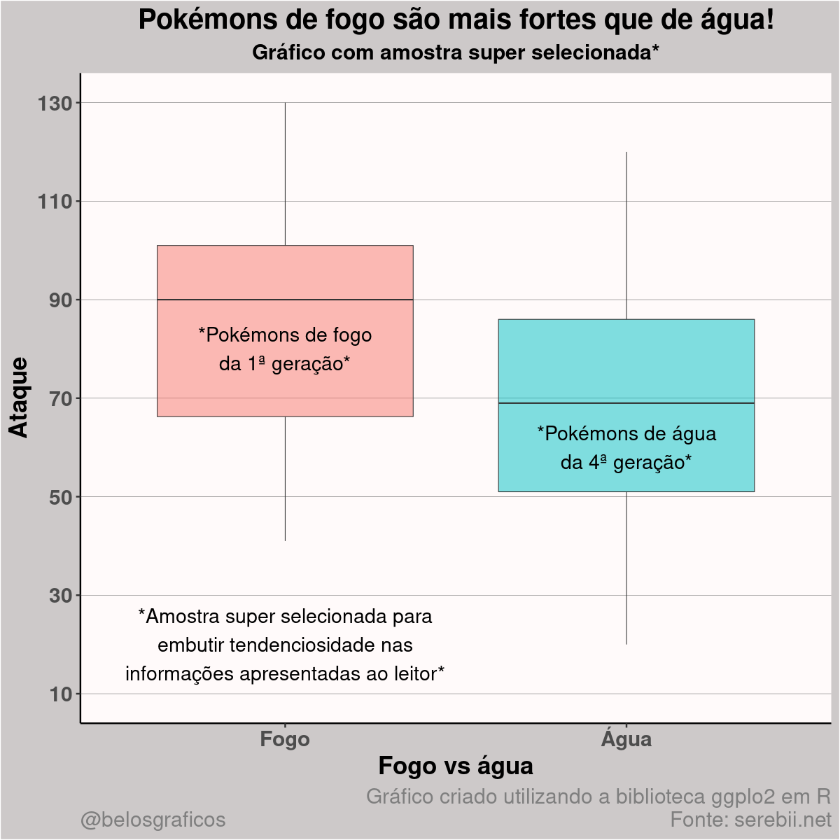

In [97]:
# Definindo um nome e tamanho para a figura a ser criada
fig_name = "pokemon-agua-vs-fogo-ggplot2.png"
fig_width = 1200
fig_height = 1200

# Cria uma figura em branco com os parâmetros anteriores
png(fig_name, width = fig_width, height = fig_height)

# Criando o gráfico: e informando os dados que iremos utilizar
ggplot(dataset, aes(x = type1,
                    y = attack,
                    fill = type1)) +
  
  # Adicionando camada: Boxplot
  geom_boxplot(alpha = 0.5) + 

  # Definindo o tema
  theme_classic(base_size = 25) +

  # Definições do eixo X
  scale_x_discrete(labels = c("Fogo", "Água")) +

  # Definições do eixo Y
  scale_y_continuous(breaks = seq(10, 130, by = 20), 
                     limits = c(10,130)) +
  
  # Mudando definições dentro do tema de acordo com o gráfico
  theme(legend.position = "none", # Remove a legenda
        
        # Título dos eixos em negrito
        axis.text.x = element_text(face = "bold", size = 30), 
        axis.text.y = element_text(face = "bold", size = 30),
        
        # Título e subtitulo do gráfico centralizados e em negrito
        plot.title = element_text(hjust = 0.5, face = "bold", size = 40),
        plot.subtitle = element_text(hjust = 0.5, face = "bold", size = 30),
        axis.title.x = element_text(face = "bold", size = 35),
        axis.title.y = element_text(face = "bold", size = 35),
        
        # Cores de fundo da figura e da área do gráfico
        plot.background = element_rect(fill = "snow3"),
        panel.background = element_rect(fill = "snow1"),
        
        # Definições das linhas de grade
        panel.grid.major = element_line(size = 0.3, linetype = 'solid', colour = "grey50"),
        panel.grid.minor = element_blank(),
        panel.grid.major.x = element_blank(),
        
        # Definição da nota de rodapé, utilizando vetores para configurar todas as notas
        plot.caption = element_text(color = 'gray50', hjust = c(0,1), size = 30)) +
  
  # Definindo os labels
  labs(x = "Fogo vs água", 
       y = "Ataque", 
       title = "Pokémons de fogo são mais fortes que de água!",
       subtitle = "Gráfico com amostra super selecionada*",
       caption = c("\n@belosgraficos","Gráfico criado utilizando a biblioteca ggplo2 em R\nFonte: serebii.net")) +
 
 # Textos auxiliares
 annotate("text",
         x = 1, y = 80,
         label = "*Pokémons de fogo\nda 1ª geração*",
         hjust = 0.5, size = 10, color = "black") +

 annotate("text",
         x = 2, y = 60,
         label = "*Pokémons de água\nda 4ª geração*",
         hjust = 0.5, size = 10, color = "black") +

annotate("text",
         x = 1, y = 20,
         label = "*Amostra super selecionada para\nembutir tendenciosidade nas\ninformações apresentadas ao leitor*",
         hjust = 0.5, size = 10, color = "black")
  
  
# Salva a figura
dev.off()
img <- readPNG(fig_name)
grid::grid.raster(img)